#### 무게를 찾기
- 데이터셋 : fish.csv
- 목표: 농어(Pearch) 길이 피쳐를 사용해서 무게를 예측하기
- 피쳐/속성 : Length
- 타겟/라벨 : Weight
- 학습방법: 지도학습 > 회귀
- 알고리즘: 선형회귀 >> 데이터 분포가 선형의 형태

[1] 모듈 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [2]:
file_path = '../data/fish.csv'

In [3]:
fishDF = pd.read_csv(file_path, usecols=[0, 1, 2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
# 종이 Perch인것만 가져오기
PerchDF = fishDF[fishDF['Species']=='Perch']

In [5]:
PerchDF.reset_index(drop= True, inplace=True)

[2-2] 결측치 확인

In [6]:
PerchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [7]:
PerchDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

[3] 상관계수

In [8]:
PerchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


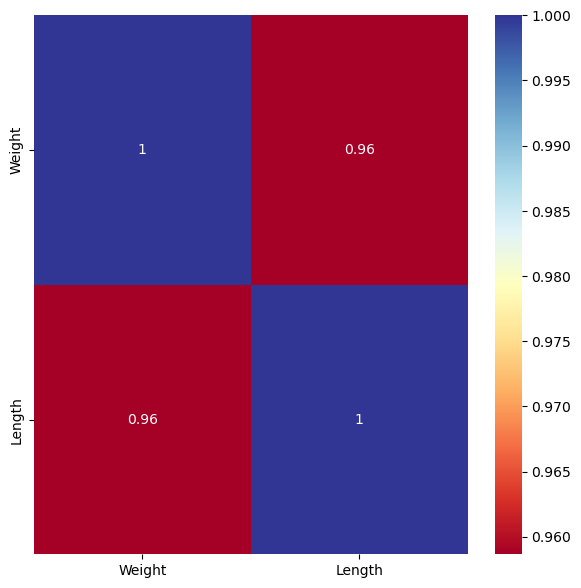

In [9]:
plt.figure(figsize=(7,7))
g = sns.heatmap(PerchDF.corr(numeric_only=True), annot=True, cmap='RdYlBu')

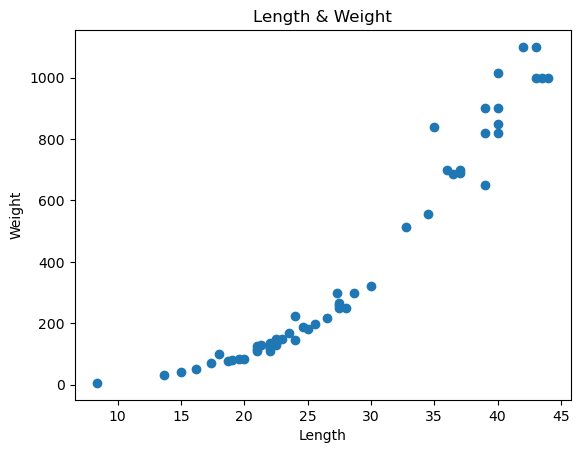

In [10]:

plt.scatter(PerchDF['Length'], PerchDF['Weight'])
plt.title('Length & Weight')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

[4] 학습준비

[4-1] 피쳐 타겟 설정

In [11]:
features = PerchDF[['Length']]
target = PerchDF['Weight']

print(f'features : {features.shape}, {features.ndim}차원')
print(f'target : {target.shape}, {target.ndim}차원')

features : (56, 1), 2차원
target : (56,), 1차원


[4-2] 훈련/테스트 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# train:test = 80:20  , test_size=0.2
X_train, X_test, y_train, y_test  = train_test_split(features, target, test_size=0.2, random_state=10)

In [14]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (44, 1), 2D
y_train : (44,), 1D
X_test : (12, 1), 2D
y_test : (12,), 1D


[5] 파이프라인 구성

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 다항
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

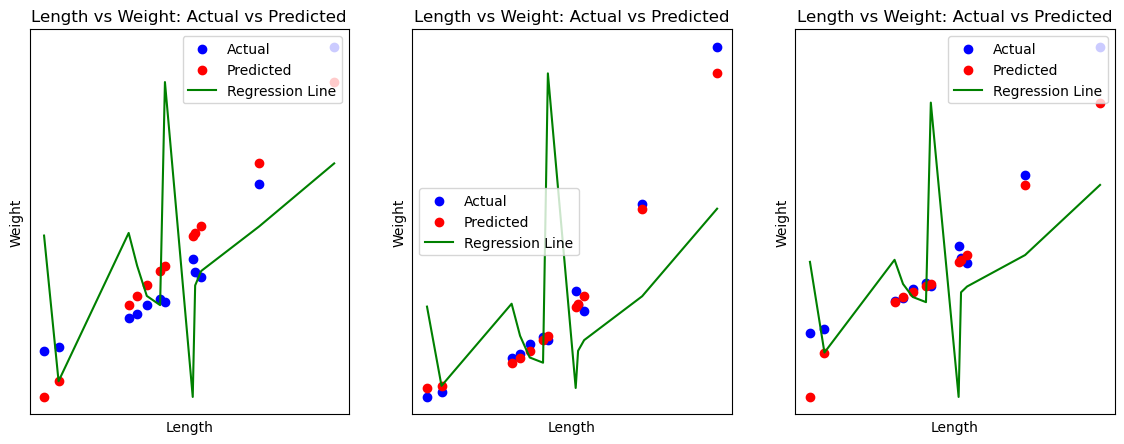

In [27]:
plt.figure(figsize=(14,5))
degrees = [1, 4,15]

X_test_sorted = X_test.sort_values(by='Length')
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    mmScaler = MinMaxScaler()
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("mmScaler", mmScaler),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, y_pred, color='red', label='Predicted')
    plt.plot(X_test_sorted, y_pred, color='green', label='Regression Line')
    plt.title('Length vs Weight: Actual vs Predicted')
    plt.xlabel('Length')
    plt.ylabel('Weight')
    plt.legend()

plt.show()
